In [1]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# How many wines are included in the data set?

In [2]:
# Reading the dataset using Pnadas.
wine = pd.read_csv("winedata.csv", delimiter=';', error_bad_lines=False)

# some rows in the dataset has 13 rows instead of 12. 
# the reading the CSV file. Panda assumes the number of columns unig the header.
# Since we have 12 clumns in the header and some rows has 13 panda throws an error. 
# conflict between the number of columns from the header and some rows. 
# Using "error_bad_lines=False" panda ignores those rows with the extra columns. 


wine.info()

# The dataset has 4896 wines. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 12 columns):
fixed acidity           4891 non-null float64
volatile acidity        4891 non-null object
citric acid             4843 non-null object
residual sugar          4886 non-null object
chlorides               4890 non-null object
free sulfur dioxide     4888 non-null object
total sulfur dioxide    4889 non-null object
density                 4890 non-null object
pH                      4890 non-null object
sulphates               4892 non-null object
alcohol                 4890 non-null object
quality                 4892 non-null object
dtypes: float64(1), object(11)
memory usage: 459.1+ KB


b'Skipping line 3149: expected 12 fields, saw 13\nSkipping line 4821: expected 12 fields, saw 13\n'


# Are all the wines unique, and if not, how many unique wines are there?

In [3]:
Wine_unique = wine.drop_duplicates(keep='first')
Wine_unique.info()
# NOT all the wines are Unique.
# There are 4013 unique Wines.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4013 entries, 0 to 4895
Data columns (total 12 columns):
fixed acidity           4011 non-null float64
volatile acidity        4011 non-null object
citric acid             3965 non-null object
residual sugar          4006 non-null object
chlorides               4010 non-null object
free sulfur dioxide     4008 non-null object
total sulfur dioxide    4009 non-null object
density                 4010 non-null object
pH                      4010 non-null object
sulphates               4012 non-null object
alcohol                 4010 non-null object
quality                 4012 non-null object
dtypes: float64(1), object(11)
memory usage: 407.6+ KB


# Are there any missing or invalid values in the data?

In [4]:
# Yes there are missing and invalid in the data
# empty cells and invalid values in the quality column.


Wine_no_NA = Wine_unique.dropna()

drop_invalid = Wine_no_NA[(wine['quality'] == 'high') | (wine['quality']== 'low') | (wine['quality']== ' ')].index
Wine_no_invalid = Wine_no_NA.drop(drop_invalid)
Wine_clean = Wine_no_invalid.astype(float)


/home/moazmohamed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [5]:
Wine_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3859 entries, 0 to 4895
Data columns (total 12 columns):
fixed acidity           3859 non-null float64
volatile acidity        3859 non-null float64
citric acid             3859 non-null float64
residual sugar          3859 non-null float64
chlorides               3859 non-null float64
free sulfur dioxide     3859 non-null float64
total sulfur dioxide    3859 non-null float64
density                 3859 non-null float64
pH                      3859 non-null float64
sulphates               3859 non-null float64
alcohol                 3859 non-null float64
quality                 3859 non-null float64
dtypes: float64(12)
memory usage: 391.9 KB


In [6]:
Wine_clean.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000
mean,6.840723,0.279966,0.334820,5.923076,0.045936,34.956725,137.315885,0.993795,3.195701,0.490417,10.588856,5.855921
std,0.866709,0.102480,0.122431,4.876653,0.023161,17.253089,43.094708,0.002913,0.151595,0.113336,1.215179,0.890578
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,10.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,107.000000,0.991600,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,8.850000,0.050000,45.000000,166.000000,0.995720,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Is the scale of the different attributes approximately equal?

In [7]:
Wine_clean.head()
# the scale of different attributes inst equal. it should be fine unless we are using 
# neural networks becasue they are more sensetive for scales. 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6.0


# Visualise the data

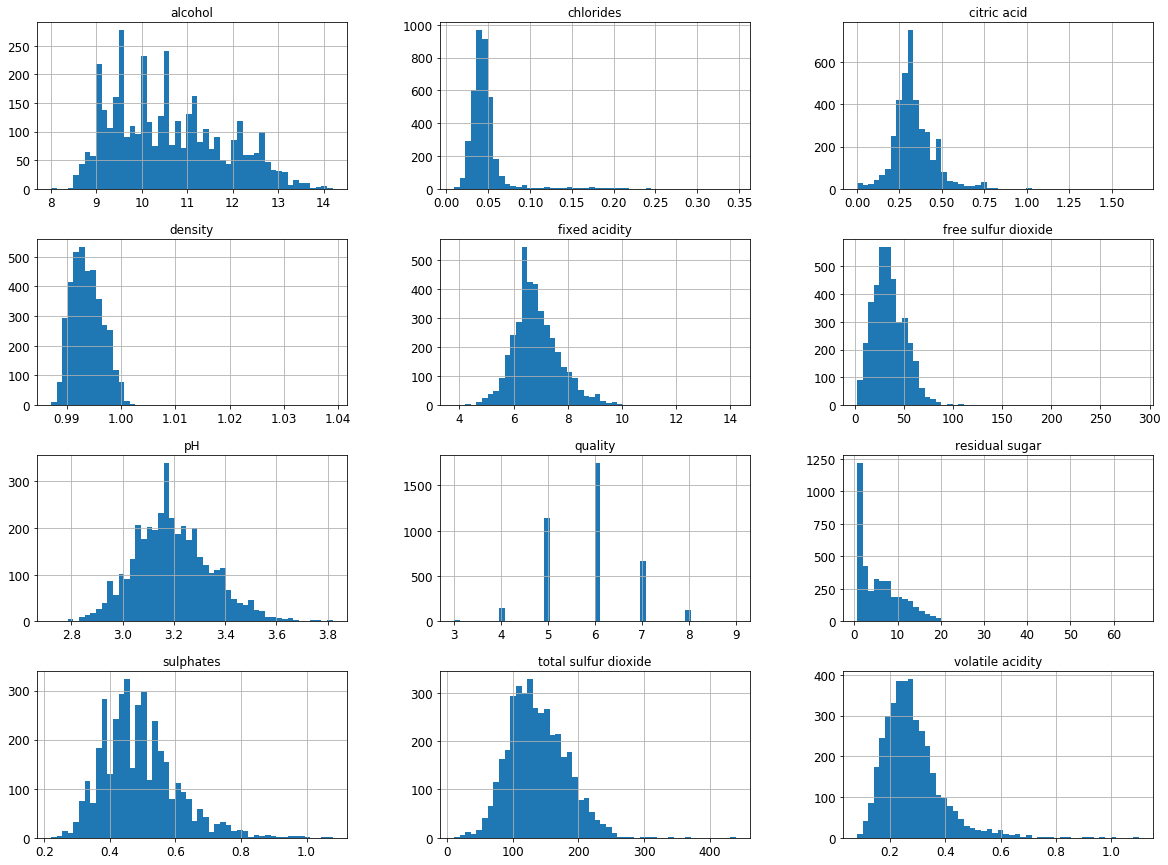

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
Wine_clean.hist(bins=50, figsize=(20,15))
plt.show()

### 1- alot of the wine in the dataset is labeled as 6. 
### 2- majority of the graphs are skewed to the left.

# Correlation Matrix

In [9]:
corr_matrix = Wine_clean.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.462462
pH                      0.121414
sulphates               0.053600
free sulfur dioxide     0.010686
citric acid             0.007488
residual sugar         -0.118115
fixed acidity          -0.126015
total sulfur dioxide   -0.186236
volatile acidity       -0.196401
chlorides              -0.215595
density                -0.337404
Name: quality, dtype: float64

 ### Alcohol, sulphates & pH are the most two attribute that are positively correlated with quality
 ### Density, volatile acidity & chlorides are the most two attribute that are negatively correlated with quality

## Plot of three most correlated attributes with quality

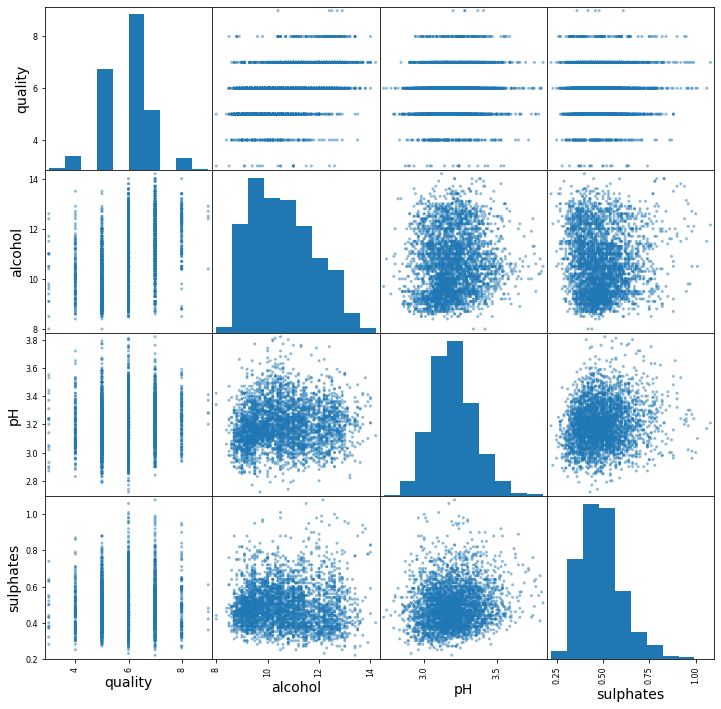

In [10]:
from pandas.plotting import scatter_matrix

attributes = ["quality", "alcohol", "pH",
              "sulphates"]
scatter_matrix(Wine_clean[attributes], figsize=(12, 12), alpha=0.5)
plt.show()

## With adjust the alpha value. It becomes somewhat noticeable the trend of alcohol with quality
## Even more noticable after plotting the trend line.

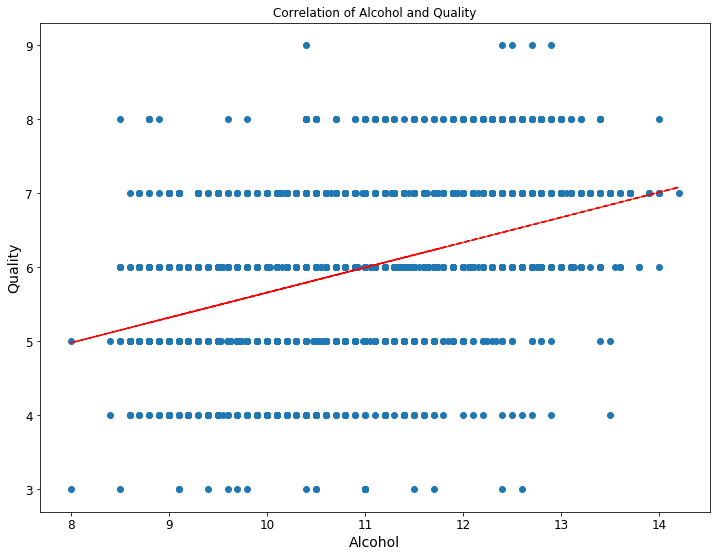

In [11]:



x = Wine_clean['alcohol']
y = Wine_clean['quality']
plt.figure(figsize=(12,9))
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('Correlation of Alcohol and Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

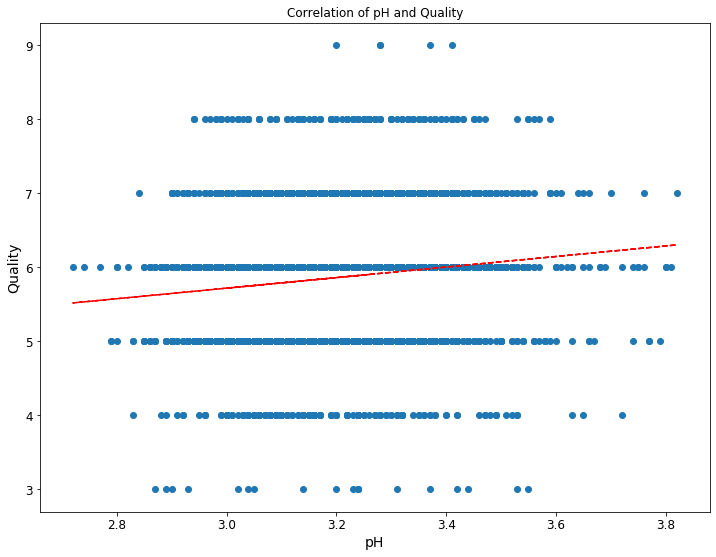

In [12]:
x = Wine_clean['pH']
y = Wine_clean['quality']
plt.figure(figsize=(12,9))
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('Correlation of pH and Quality')
plt.xlabel('pH')
plt.ylabel('Quality')
plt.show()

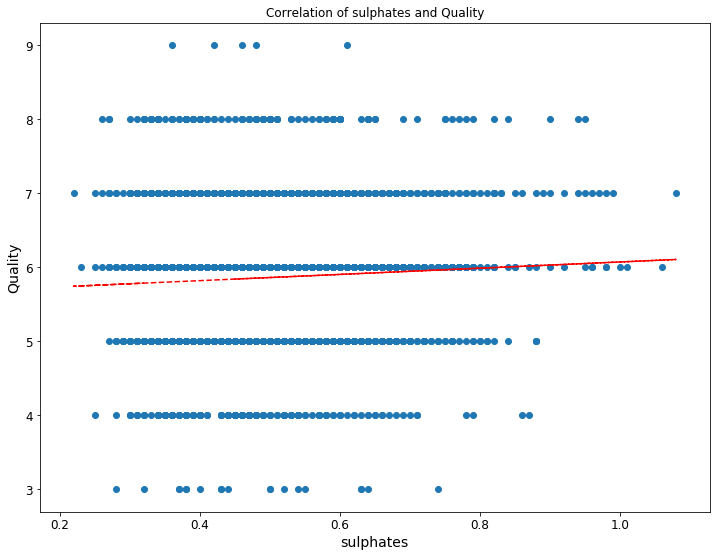

In [13]:
x = Wine_clean['sulphates']
y = Wine_clean['quality']
plt.figure(figsize=(12,9))
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('Correlation of sulphates and Quality')
plt.xlabel('sulphates')
plt.ylabel('Quality')
plt.show()

# Predicting wine quality: baseline

In [14]:
from sklearn.model_selection import train_test_split

# Creating a train and test sets
train_set, test_set = train_test_split(Wine_clean, test_size=0.2, random_state=42)


In [15]:

# calculating the median value for quality
quality_median = train_set['quality'].median()

# Creating a numpy array for the median predictor as the same size as the train set.
predict_median = np.multiply(np.ones(len(train_set)), quality_median)

# Creating train set without labels.
wine_tr = train_set.drop('quality', axis=1)

# Creating labes for training algorithms.
wine_tr_labels = train_set['quality'].copy()

In [16]:
from sklearn.metrics import mean_squared_error

median_mse = mean_squared_error(wine_tr_labels, predict_median)
median_rmse = np.sqrt(median_mse)
median_rmse

0.9069075881818288

### The Rmse for median predictor is '0.9069075881818288'
### Since we are trying to predict quality and quality is a continuous output then regression is the most suited methdology. 
### But in this particular case, classfication can be dvantagous hence the algorithms would only try to fit to 3 labels only or only discrete

# Predicting wine quality
## linear regression

In [17]:
from sklearn.linear_model import LinearRegression

#training 
lin_reg = LinearRegression()
lin_reg.fit(wine_tr, wine_tr_labels)

# making predictions
wine_predictions = lin_reg.predict(wine_tr)

#calculating RMSE
lin_mse = mean_squared_error(wine_tr_labels, wine_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.748165653121879

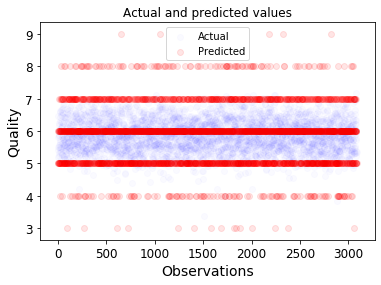

In [18]:
_, ax = plt.subplots()

ax.scatter(x = range(0, wine_predictions.size), y=wine_predictions, c = 'blue', label = 'Actual', alpha = 0.02)
ax.scatter(x = range(0, wine_tr_labels.size), y=wine_tr_labels, c = 'red', label = 'Predicted', alpha = 0.1)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Quality')
plt.legend()
plt.show()

## Nearest neighbour regression model

In [19]:
from sklearn.neighbors import KNeighborsRegressor

#training 
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(wine_tr,wine_tr_labels)

#making predictions
wine_predictions_neigh = neigh.predict(wine_tr)

#calculating RMSE
neigh_mse = mean_squared_error(wine_tr_labels, wine_predictions_neigh)
neigh_rmse = np.sqrt(neigh_mse)
neigh_rmse

0.5463605770391319

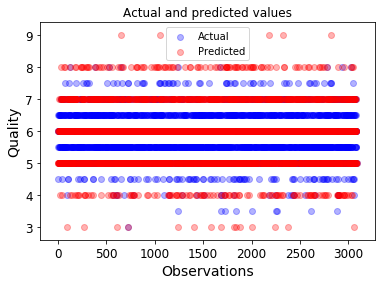

In [20]:
_, ax = plt.subplots()

ax.scatter(x = range(0, wine_predictions_neigh.size), y=wine_predictions_neigh, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, wine_tr_labels.size), y=wine_tr_labels, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Quality')
plt.legend()
plt.show()

## Decision tree regression model


In [21]:
from sklearn.tree import DecisionTreeRegressor

#training 
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(wine_tr,wine_tr_labels)

#making predictions
wine_predictions_tree = tree_reg.predict(wine_tr)

#calculating RMSE
tree_mse = mean_squared_error(wine_tr_labels, wine_predictions_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

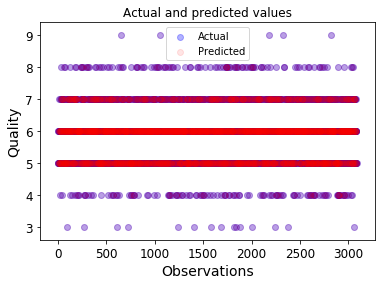

In [22]:
_, ax = plt.subplots()

ax.scatter(x = range(0, wine_predictions_tree.size), y=wine_predictions_tree, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, wine_tr_labels.size), y=wine_tr_labels, c = 'red', label = 'Predicted', alpha = 0.1)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Quality')
plt.legend()
plt.show()

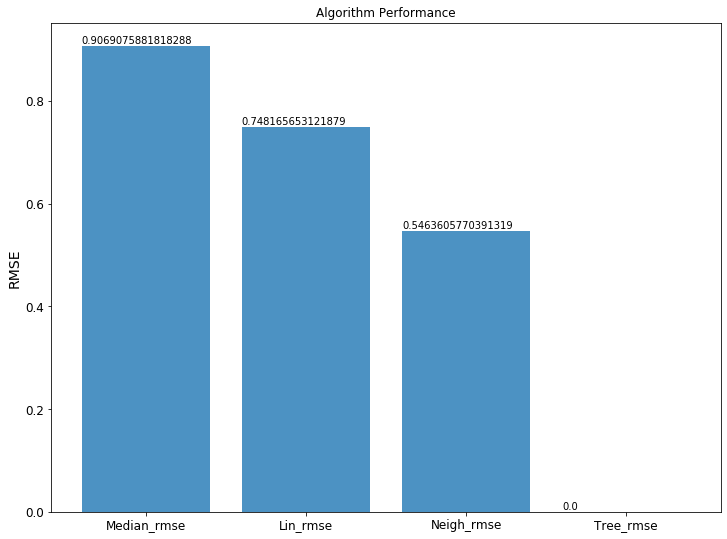

In [23]:

Algorithms = ['Median_rmse','Lin_rmse','Neigh_rmse','Tree_rmse']
y_pos = np.arange(len(Algorithms))
Algorithm_performance = [median_rmse,lin_rmse,neigh_rmse,tree_rmse]

plt.figure(figsize=(12,9))
bars = plt.bar(y_pos, Algorithm_performance, align='center', alpha=0.8)
plt.xticks(y_pos, Algorithms)
plt.ylabel('RMSE')
plt.title('Algorithm Performance')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.show()

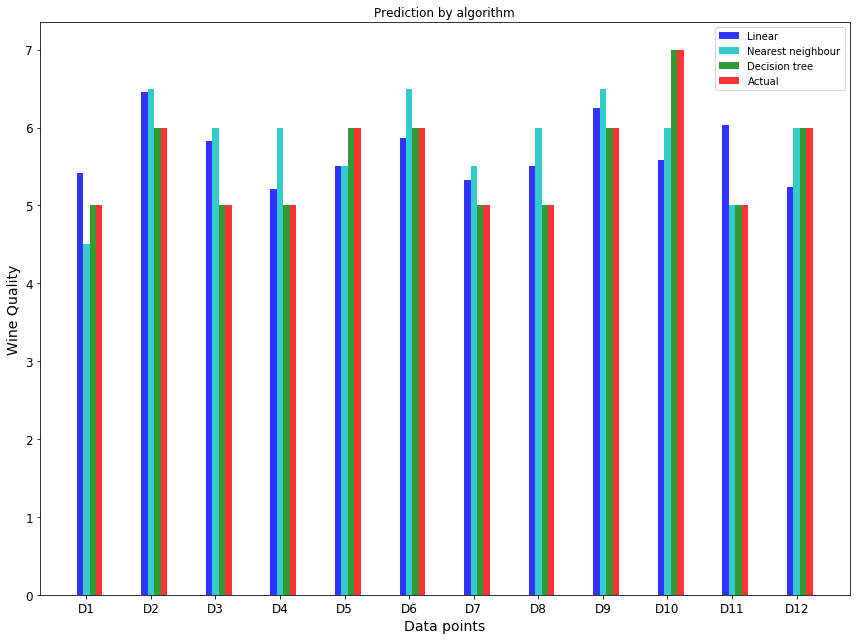

In [24]:
some_labels = wine_tr_labels.iloc[:12]
some_data = wine_tr.iloc[:12]

predicted_quality_lin = lin_reg.predict(some_data)
predicted_quality_neigh = neigh.predict(some_data)
predicted_quality_tree = tree_reg.predict(some_data)
actual_quality = some_labels


# data to plot
n_groups = 12
linear = predicted_quality_lin
Nearest_neighbour = predicted_quality_neigh
Decision_tree = predicted_quality_tree
actual = actual_quality

# create plot
fig, ax = plt.subplots(figsize=(12,9))
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, linear, bar_width,
alpha=opacity,
color='b',
label='Linear')

rects2 = plt.bar(index + bar_width, Nearest_neighbour, bar_width,
alpha=opacity,
color='c',
label='Nearest neighbour')


rects3 = plt.bar(index+ (bar_width*2), Decision_tree, bar_width,
alpha=opacity,
color='g',
label='Decision tree')

rects4 = plt.bar(index + (bar_width*3), actual, bar_width,
alpha=opacity,
color='r',
label='Actual')

plt.xlabel('Data points')
plt.ylabel('Wine Quality')
plt.title('Prediction by algorithm')
plt.xticks(index + bar_width, ('D1', 'D2', 'D3', 'D4','D5','D6','D7','D8','D9','D10','D11','D12'))
plt.legend()

plt.tight_layout()
plt.show()



# 1- Decision tree is overfitting the data. 
# 2- Without perfomaning cross validation K-Nearest neighbour seem to perform best out of the three algorithms
# 3- cross validation is needed to gauge the accurate perfomance of a model. 

### Decision tree seems to be overfitting pretty badly.
### Nearest Neighbour has the lowiest error value even better than linear regression. 

# Cross validation
## linear regression

In [25]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

lin_scores = cross_val_score(lin_reg, wine_tr, wine_tr_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [0.76964178 0.73864115 0.76881079 0.72305448 0.81376137 0.78612928
 0.7300779  0.76606587 0.73091914 0.72740707]
Mean: 0.7554508837920376
Standard deviation: 0.028632092805238273


# Cross validation
## Nearest neighbour

In [26]:
neigh_scores = cross_val_score(neigh, wine_tr, wine_tr_labels,
                             scoring="neg_mean_squared_error", cv=10)
neigh_rmse_scores = np.sqrt(-neigh_scores)
display_scores(neigh_rmse_scores)

Scores: [0.95021714 0.95361686 0.95784953 0.91729164 0.93606281 0.96332421
 0.93433257 0.97783886 0.9572858  0.91301911]
Mean: 0.9460838530567177
Standard deviation: 0.01950419966324677


# Cross validation
## Decision tree

In [27]:
scores = cross_val_score(tree_reg, wine_tr, wine_tr_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [1.08386221 1.03498667 0.9770837  0.9570045  0.99187639 1.07336087
 0.96709621 0.9983753  0.98528129 1.05989463]
Mean: 1.0128821766445273
Standard deviation: 0.043941231935062025


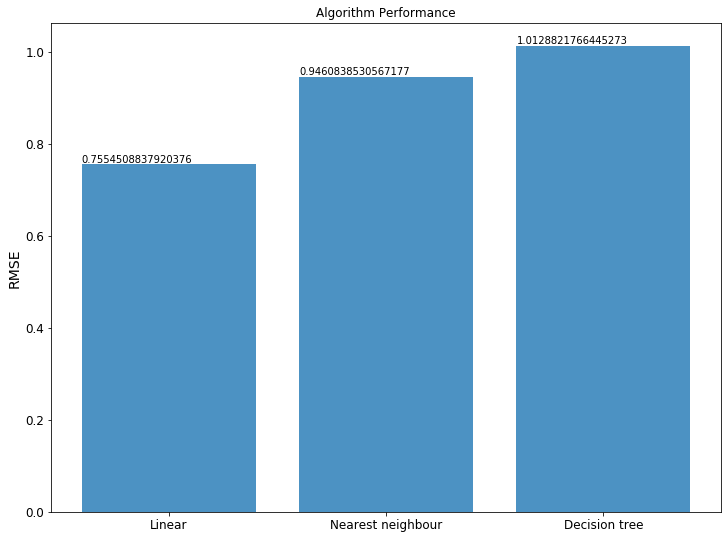

In [28]:
objects = ['Linear','Nearest neighbour','Decision tree']
y_pos = np.arange(len(objects))
performance = [lin_rmse_scores.mean(),neigh_rmse_scores.mean(),tree_rmse_scores.mean()]

plt.figure(figsize=(12,9))
bars = plt.bar(y_pos, performance, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('RMSE')
plt.title('Algorithm Performance')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.show()



# after performing the corss validation Linear regression seems to a good model. 

### the imprtance of cross validation is evident is previous results. 
### decision tree seemed to have the lowest error but after preforming cross validation it seemed to be performing the worst among the three algorithms
### linear regression seems to be the most suitable model for our dataset. 

# Free Choice
## Exploring other models
### Using parameter estimation tools

## Grid Search + Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=210, random_state=42, max_features=2)
forest_reg.fit(wine_tr, wine_tr_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=210,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 18 (3×6) combinations of hyperparameters
    {'n_estimators': [160, 170, 180, 190, 200, 210,], 'max_features': [2, 4, 6]},
    # then try 18 (3×6) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [160, 170, 180, 190, 200, 210,], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42,n_jobs=-1 )
# train across 10 folds, that's a total of (18+18)*10=360 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,n_jobs=-1)

grid_search.fit(wine_tr, wine_tr_labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6],
        

In [31]:
# Checking my best parameters
grid_search.best_params_

{'max_features': 2, 'n_estimators': 210}

In [32]:
final_model_GridSearch = grid_search.best_estimator_

In [33]:
wine_predictions_forest = final_model_GridSearch.predict(wine_tr)
forest_mse = mean_squared_error(wine_tr_labels, wine_predictions_forest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.258631112639694

In [34]:
final_model_GridSearch_scores = cross_val_score(final_model_GridSearch, wine_tr, wine_tr_labels,
                                scoring="neg_mean_squared_error", cv=10)
final_model_GridSearch_rmse_scores = np.sqrt(-final_model_GridSearch_scores)
display_scores(final_model_GridSearch_rmse_scores)

Scores: [0.73483244 0.7156034  0.68073261 0.68339131 0.67690388 0.74004525
 0.69708598 0.70243268 0.70683134 0.6762804 ]
Mean: 0.7014139275870815
Standard deviation: 0.02201045833380156


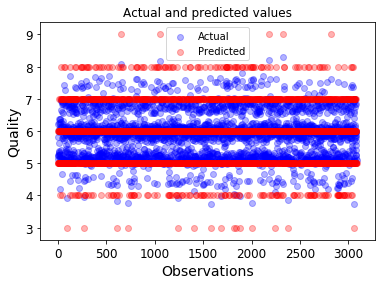

In [35]:
_, ax = plt.subplots()

ax.scatter(x = range(0, wine_predictions_forest.size), y=wine_predictions_forest, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, wine_tr_labels.size), y=wine_tr_labels, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Quality')
plt.legend()
plt.show()

### Can Random Search perfom better?

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#param_distribs = {
 #       'n_estimators': randint(low=1, high=1000),
  #      'max_features': randint(low=1, high=5),
   # }

#forest_reg = RandomForestRegressor(random_state=42,n_jobs=-1)
#rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
 #                               n_iter=1000, cv=5, scoring='neg_mean_squared_error', random_state=42,n_jobs=-1)

#rnd_search.fit(wine_tr, wine_tr_labels)

In [37]:
RandSearch =RandomForestRegressor(n_estimators=804, random_state=42, max_features=2,n_jobs=-1)
RandSearch.fit(wine_tr, wine_tr_labels)
##final_model_RandSearch = rnd_search.best_estimator_
##rnd_search.best_params_
final_model_RandSearch = RandSearch

In [38]:
final_model_RandSearch_scores = cross_val_score(final_model_RandSearch, wine_tr, wine_tr_labels,
                                scoring="neg_mean_squared_error", cv=10)
final_model_RandSearch_rmse_scores = np.sqrt(-final_model_RandSearch_scores)
display_scores(final_model_RandSearch_rmse_scores)

Scores: [0.73298132 0.71253057 0.67902217 0.68965312 0.67175775 0.73985511
 0.69181141 0.70014997 0.70809991 0.67503196]
Mean: 0.7000893299104441
Standard deviation: 0.02221254446999213


# Feature scalling 
## Will Feature scalling help? 

In [39]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
wine_clean_StandardScaler = sc_X.fit_transform(Wine_clean)

train_set_StandardScaler, test_set_StandardScaler = train_test_split(Wine_clean, test_size=0.2, random_state=42)

# Creating train set without labels.
wine_tr_ss = train_set_StandardScaler.drop('quality', axis=1)

# Creating labels for training algorithms.
wine_tr_labels_ss = train_set_StandardScaler['quality'].copy()

In [40]:
from sklearn.ensemble import RandomForestRegressor

forest_reg_ss = RandomForestRegressor(n_estimators=210, random_state=42, max_features=2,n_jobs=-1)
forest_reg_ss.fit(wine_tr_ss, wine_tr_labels_ss)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=210,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [41]:
wine_predictions_forest_ss = forest_reg_ss.predict(wine_tr)
forest_mse_ss = mean_squared_error(wine_tr_labels_ss, wine_predictions_forest_ss)
forest_rmse_ss = np.sqrt(forest_mse_ss)
forest_rmse_ss

0.258631112639694

In [42]:
forest_reg_ss_scores = cross_val_score(forest_reg_ss, wine_tr_ss, wine_tr_labels_ss,
                                scoring="neg_mean_squared_error", cv=10)
forest_mse_ss_rmse_scores = np.sqrt(-forest_reg_ss_scores)
display_scores(forest_mse_ss_rmse_scores)

Scores: [0.73483244 0.7156034  0.68073261 0.68339131 0.67690388 0.74004525
 0.69708598 0.70243268 0.70683134 0.6762804 ]
Mean: 0.7014139275870815
Standard deviation: 0.02201045833380156


# Data cleaning 
### Instead of dropping the NA values 
### maybe replacing them with median value 
### will have a postive impact on our dataset 
### hence more data will help the algorithms to generalize better. 

In [43]:
Wine_no_NA = Wine_unique.dropna()

drop_invalid = Wine_no_NA[(wine['quality'] == 'high') | (wine['quality']== 'low') | (wine['quality']== ' ')].index
Wine_no_invalid = Wine_no_NA.drop(drop_invalid)
Wine_clean = Wine_no_invalid.astype(float)


/home/moazmohamed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

drop_invalid = Wine_unique[(wine['quality'] == 'high') | (wine['quality']== 'low') | (wine['quality']== ' ')].index
Wine_no_invalid = Wine_unique.drop(drop_invalid)
Wine_num = Wine_no_invalid.astype(float)
imputer.fit(Wine_num)
X = imputer.transform(Wine_num)

type(X)

/home/moazmohamed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


numpy.ndarray

In [45]:
wine_clean_m = pd.DataFrame(X, columns=Wine_num.columns,
                          index=Wine_num.index)

In [46]:
wine_clean_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3917 entries, 0 to 4895
Data columns (total 12 columns):
fixed acidity           3917 non-null float64
volatile acidity        3917 non-null float64
citric acid             3917 non-null float64
residual sugar          3917 non-null float64
chlorides               3917 non-null float64
free sulfur dioxide     3917 non-null float64
total sulfur dioxide    3917 non-null float64
density                 3917 non-null float64
pH                      3917 non-null float64
sulphates               3917 non-null float64
alcohol                 3917 non-null float64
quality                 3917 non-null float64
dtypes: float64(12)
memory usage: 397.8 KB


In [47]:
train_set_m, test_set_m = train_test_split(wine_clean_m, test_size=0.2, random_state=42)
# Creating train set without labels.
wine_tr_m = train_set_m.drop('quality', axis=1)

# Creating labes for training algorithms.
wine_tr_labels_m = train_set_m['quality'].copy()


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#training 
lin_reg = LinearRegression()
lin_reg.fit(wine_tr_m, wine_tr_labels_m)

# making predictions
wine_predictions_lin_m = lin_reg.predict(wine_tr_m)

#calculating RMSE
lin_mse_m = mean_squared_error(wine_tr_labels_m, wine_predictions_lin_m)
lin_rmse_m = np.sqrt(lin_mse_m)
lin_rmse_m

0.7394849214132303

In [49]:
from sklearn.ensemble import RandomForestRegressor

forest_reg_m = RandomForestRegressor(n_estimators=210, random_state=42, max_features=2,n_jobs=-1)
forest_reg_m.fit(wine_tr_m, wine_tr_labels_m)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=210,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [50]:
wine_predictions_forest_m = forest_reg_m.predict(wine_tr_m)
forest_mse_m = mean_squared_error(wine_tr_labels_m, wine_predictions_forest_m)
forest_rmse_m = np.sqrt(forest_mse_m)
forest_rmse_m

0.2546797981741342

In [51]:
from sklearn.model_selection import cross_val_score
forest_reg_m_scores = cross_val_score(forest_reg_m, wine_tr_m, wine_tr_labels_m,
                                scoring="neg_mean_squared_error", cv=10)
forest_mse_m_rmse_scores = np.sqrt(-forest_reg_m_scores)
display_scores(forest_mse_m_rmse_scores)

Scores: [0.70624889 0.72861524 0.6703835  0.73702587 0.68934535 0.66400896
 0.64505925 0.69173102 0.69992683 0.67558573]
Mean: 0.6907930646767785
Standard deviation: 0.02711098664212111


### Data Cleaning + random forest + gridsearch

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 18 (3×6) combinations of hyperparameters
    {'n_estimators': [130, 170, 180, 190, 200, 210,], 'max_features': [2, 4, 6]},
    # then try 18 (3×6) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [160, 170, 180, 190, 200, 210,], 'max_features': [2, 3, 4]},
  ]

forest_reg_m_GS = RandomForestRegressor(random_state=42,n_jobs=-1)
# train across 10 folds, that's a total of (18+18)*5=180 rounds of training 
grid_search = GridSearchCV(forest_reg_m_GS, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True
                          ,n_jobs=-1)

grid_search.fit(wine_tr_m, wine_tr_labels_m)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6],
         

In [53]:
forest_reg_m_GridSearch = grid_search.best_estimator_

In [54]:
forest_reg_m_GridSearch_scores = cross_val_score(forest_reg_m_GridSearch, wine_tr_m, wine_tr_labels_m,
                                scoring="neg_mean_squared_error", cv=10)
forest_reg_m_GridSearch_rmse_scores = np.sqrt(-forest_reg_m_GridSearch_scores)
display_scores(forest_reg_m_GridSearch_rmse_scores)

Scores: [0.70931457 0.72893174 0.67060678 0.72776968 0.69220331 0.65703905
 0.64498445 0.68702242 0.69370779 0.6819686 ]
Mean: 0.6893548398030772
Standard deviation: 0.02625264116665334


### Data Cleaning + random forest + gridsearch

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=1000),
        'max_features': randint(low=1, high=5),
    }

#forest_reg_r = RandomForestRegressor(random_state=42,n_jobs=-1)
#rnd_search = RandomizedSearchCV(forest_reg_r, param_distributions=param_distribs,
 #                               n_iter=1000, cv=5, scoring='neg_mean_squared_error', random_state=42,n_jobs=-1)

#rnd_search.fit(wine_tr_m, wine_tr_labels_m)

In [56]:
RandSearch_m =RandomForestRegressor(n_estimators=971, random_state=42, max_features=4,n_jobs=-1)
RandSearch_m.fit(wine_tr_m, wine_tr_labels_m)
#forest_reg_r = rnd_search.best_estimator_
#rnd_search.best_params_
forest_reg_r= RandSearch_m

In [57]:
forest_reg_r_scores = cross_val_score(forest_reg_r, wine_tr_m, wine_tr_labels_m,
                                scoring="neg_mean_squared_error", cv=10)
forest_reg_r_scores_rmse_scores = np.sqrt(-forest_reg_r_scores)
display_scores(forest_reg_r_scores_rmse_scores)

Scores: [0.70733765 0.73169892 0.6624917  0.73703262 0.6913364  0.65856798
 0.64271861 0.68228501 0.70527669 0.67525198]
Mean: 0.6893997561041165
Standard deviation: 0.02956392247203183


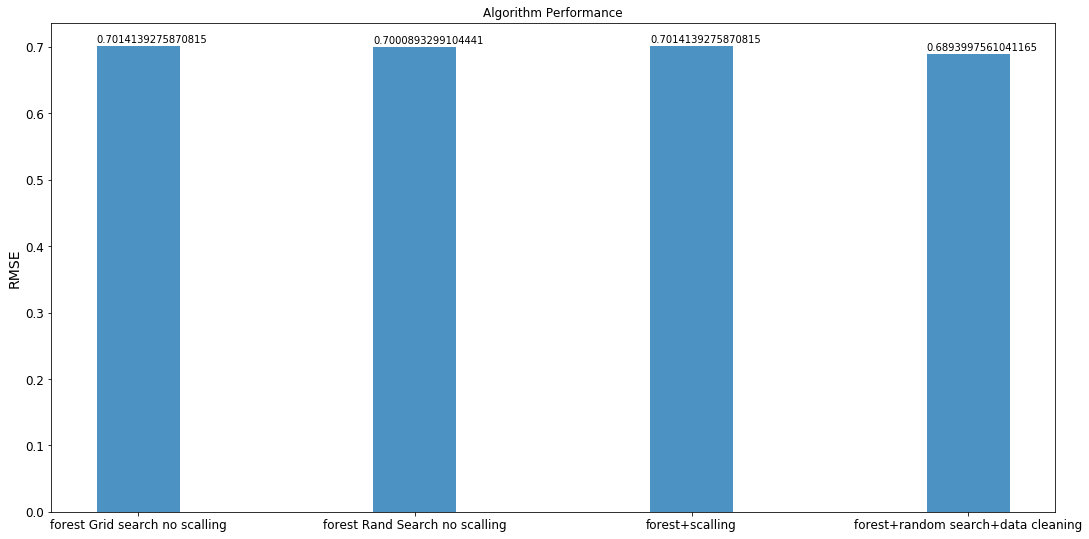

In [58]:
objects = ['forest Grid search no scalling','forest Rand Search no scalling','forest+scalling','forest+random search+data cleaning']
y_pos = np.arange(len(objects))
performance = [final_model_GridSearch_rmse_scores.mean(),final_model_RandSearch_rmse_scores.mean(),forest_mse_ss_rmse_scores.mean(),forest_reg_r_scores_rmse_scores.mean()]

plt.figure(figsize=(18,9))
bars = plt.bar(y_pos, performance, align='center', alpha=0.8, width=0.3)
plt.xticks(y_pos, objects)
plt.ylabel('RMSE')
plt.title('Algorithm Performance')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.show()

### it appears that scalling the data does helps but not that much. 
### i did expect the model to perform better with more data avaliable but according to my results not that signficant. 
### with the right data cleaning methods and scalling combine that with a randomize search to obtain the best 
### parameters for random forest i believe its an okay results. 

### if i wanted to push this further i would drasticly change the labels from integers to classificans 
### as in any 6 values as averge, x<6 as below average, x>6 above average wine quality 
### then treat it as classification problem. i am not a wine person but i do believe the wine quality is a matter of aquired taste and not 
### imperical ground truth. hence putting a number on quality is diffcult but ballbarking the qulaity according to classfication should be more 
### doable. 

## Evaluate the best model.

In [59]:
#Creating train set without labels.
wine_test_m = test_set_m.drop('quality', axis=1)

# Creating labes for training algorithms.
wine_test_labels_m = test_set_m['quality'].copy()

# Make predictions.
final_predictions = forest_reg_r.predict(wine_test_m)

# Calculating the RMSE
final_mse = mean_squared_error(wine_test_labels_m, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

0.7111909200561292
